# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
#import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)


592
['busselton', 'hermanus', 'ikalamavony', 'taoudenni', 'dubrovnik', 'meulaboh', 'dikson', 'kodiak', 'chuy', 'georgetown', 'lazaro cardenas', 'port alfred', 'barrow', 'wukari', 'sumbawa', 'port elizabeth', 'necochea', 'tuatapere', 'gat', 'butaritari', 'san quintin', 'hakvik', 'grand river south east', 'solnechnyy', 'muli', 'ilulissat', 'atar', 'coari', 'taolanaro', 'yellowknife', 'leningradskiy', 'rikitea', 'thompson', 'bluff', 'caravelas', 'umzimvubu', 'east london', 'kirakira', 'hithadhoo', 'narsaq', 'san jeronimo', 'linhares', 'terskaya', 'kapaa', 'bontang', 'sao gotardo', 'victoria', 'khatanga', 'qaanaaq', 'mahebourg', 'sorvag', 'constitucion', 'haines junction', 'hede', 'castro', 'surovatikha', 'barentsburg', 'dunedin', 'key west', 'kurilsk', 'am timan', 'avarua', 'port blair', 'rudnichnyy', 'bubaque', 'maun', 'lebu', 'kavieng', 'tougan', 'puerto ayora', 'port shepstone', 'yuncheng', 'jamestown', 'ushuaia', 'mataura', 'karamay', 'longyearbyen', 'belushya guba', 'atuona', 'mayumb

In [3]:
#city = "kimbe"
# query_url = url + "appid=" + api_key + "&q=" + city
from api_keys import api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


In [4]:
# create lists for weather API data:
city_name = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []



In [5]:
# get weather data
print("Beginning Data Retrieval")
print("---------------------------")
counter = 0

for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json() 
        #print("Processing record " +"|" + city )
        print(f"{url}&q={city}")
        city_name.append(response['name'])
        Country.append(response ['sys']['country'])
        Cloudiness.append (response['clouds']['all'])
        Date.append(response ['dt'])
        Humidity.append (response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append (response['main']['temp_max'])
        Wind_Speed.append (response['wind']['speed'])
        time.sleep(2.01)
        counter = counter + 1
        print("Processing record " + str(counter) + "|" + city )

    except:
        print("City not found. Skipping...")
    continue


Beginning Data Retrieval
---------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=busselton
Processing record 1|busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=hermanus
Processing record 2|hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=ikalamavony
Processing record 3|ikalamavony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=taoudenni
Processing record 4|taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=dubrovnik
Processing record 5|dubrovnik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=meulaboh
Processing record 6|meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e8

Processing record 51|dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=key west
Processing record 52|key west
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=kurilsk
Processing record 53|kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=am timan
Processing record 54|am timan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=avarua
Processing record 55|avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=port blair
Processing record 56|port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=rudnichnyy
Processing record 57|rudnichnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=bubaque
Proces

Processing record 103|saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=norman wells
Processing record 104|norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=vaini
Processing record 105|vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=sabha
Processing record 106|sabha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=collierville
Processing record 107|collierville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=hilo
Processing record 108|hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=chagda
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=ponta do sol
Pro

Processing record 154|mvomero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=bambanglipuro
Processing record 155|bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=san cristobal
Processing record 156|san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=pativilca
Processing record 157|pativilca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=bolungarvik
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=luganville
Processing record 158|luganville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=vao
Processing record 159|vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e88570655

Processing record 206|guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=azimur
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=hovd
Processing record 207|hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=shenjiamen
Processing record 208|shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=kijang
Processing record 209|kijang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=batagay
Processing record 210|batagay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=iqaluit
Processing record 211|iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=cidreira
Processing

Processing record 258|ijui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=laon
Processing record 259|laon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=patterson
Processing record 260|patterson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=kumluca
Processing record 261|kumluca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=vaitupu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=mutsamudu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=coihaique
Processing record 262|coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=chebarkul
Processing rec

Processing record 311|eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=kulim
Processing record 312|kulim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=raudeberg
Processing record 313|raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=omboue
Processing record 314|omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=manicore
Processing record 315|manicore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=virginia beach
Processing record 316|virginia beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=puerto madryn
Processing record 317|puerto madryn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dc

Processing record 363|vyshkov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=viedma
Processing record 364|viedma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=severo-kurilsk
Processing record 365|severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=platanos
Processing record 366|platanos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=meyungs
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=gulbarga
Processing record 367|gulbarga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=vagur
Processing record 368|vagur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=panama city

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=kieta
Processing record 410|kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=provideniya
Processing record 411|provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=aleksandrovskiy zavod
Processing record 412|aleksandrovskiy zavod
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=sioux lookout
Processing record 413|sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=tucupita
Processing record 414|tucupita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=harbour breton
Processing record 415|harbour breton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706

Processing record 461|neuquen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=atambua
Processing record 462|atambua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=tabiauea
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=qaqortoq
Processing record 463|qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=sacueni
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=amarante do maranhao
Processing record 464|amarante do maranhao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=shimoda
Processing record 465|shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dc

Processing record 511|pedasi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=gobabis
Processing record 512|gobabis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=borovskoy
Processing record 513|borovskoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a159d061e71f48e7b8e885706556dce&q=ayan
Processing record 514|ayan


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# convert lists into DF by zipping lists as tuples:
city_weather = list(zip(city_name,Cloudiness,Country, Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed))
city_weather_df = pd.DataFrame(city_weather, columns=['city_name','Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max_Temp', 'Wind_Speed'])

city_weather_df.head()

,city_name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Busselton,0,AU,1552575308,40,-33.64,115.35,64.00,11.77
1,Hermanus,0,ZA,1552574807,68,-34.42,19.24,84.99,13.00
2,Ikalamavony,80,MG,1552575342,70,-21.17,46.60,71.50,3.38
3,Taoudenni,0,ML,1552575344,15,22.68,-3.98,86.40,11.77
4,Dubrovnik,75,HR,1552573800,76,42.65,18.09,51.80,6.93


In [18]:
city_weather_df.count()

city_name     514
Cloudiness    514
Country       514
Date          514
Humidity      514
Lat           514
Lng           514
Max_Temp      514
Wind_Speed    514
dtype: int64

In [22]:
# export city_weather_df into a csv
city_weather_df.to_csv("city_weather.csv")


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

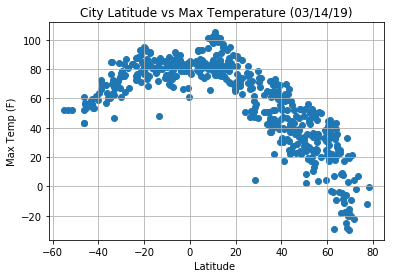

In [27]:
# Plot Latitude vs Max Temp in each city
plt.scatter(city_weather_df['Lat'], city_weather_df['Max_Temp'], marker='o' )


plt.title("City Latitude vs Max Temperature (03/14/19)")
plt.xlabel("Latitude ")
plt.ylabel("Max Temp (F)")
plt.grid()

#save plot as png

plt.savefig("Latitude vs Max Temp.png")


#### Latitude vs. Humidity Plot

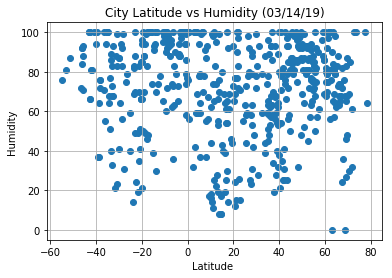

In [28]:
# Plot Latitude vs Humidity in each city
plt.scatter(city_weather_df['Lat'], city_weather_df['Humidity'], marker='o' )


plt.title("City Latitude vs Humidity (03/14/19)")
plt.xlabel("Latitude ")
plt.ylabel("Humidity")
plt.grid()

#save plot as png

plt.savefig("City Latitude vs Humidity.png")


#### Latitude vs. Cloudiness Plot

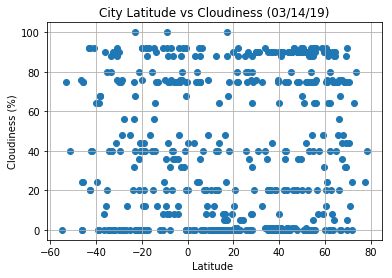

In [29]:
# Plot Latitude vs Cloudiness in each city
plt.scatter(city_weather_df['Lat'], city_weather_df['Cloudiness'], marker='o' )


plt.title("City Latitude vs Cloudiness (03/14/19)")
plt.xlabel("Latitude ")
plt.ylabel("Cloudiness (%)")
plt.grid()

#save plot as png

plt.savefig("City Latitude vs Cloudiness.png")


#### Latitude vs. Wind Speed Plot

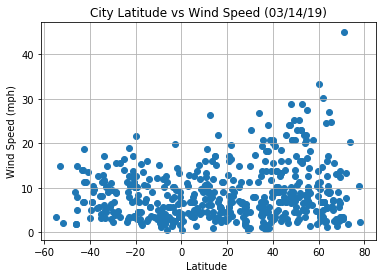

In [30]:
# Plot Latitude vs Cloudiness in each city
plt.scatter(city_weather_df['Lat'], city_weather_df['Wind_Speed'], marker='o' )


plt.title("City Latitude vs Wind Speed (03/14/19)")
plt.xlabel("Latitude ")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#save plot as png

plt.savefig("City Latitude vs Wind Speed.png")
